In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_csv('DS_K45.csv')
df.columns

Index(['Class', 'PK_AvgLineCode', 'PK_AvgNesting',
       'CSLEX_NumberOfUniqueKeywords', 'CSORD_AvgLineCode',
       'CSORD_AvgLineCodeDecl', 'CSORD_AvgLineCodeExe', 'CSORD_MaxLineCode',
       'CSORD_MaxLineCodeDecl', 'CSORD_MaxLineCodeExe', 'CSORD_SDLineCode',
       'CSORD_SDLineCodeDecl', 'CSORD_SDLineCodeExe', 'CSORD_LogLineCodeExe',
       'CSORD_AvgLineCodeNAMM', 'CSORD_AvgLineCodeDeclNAMM',
       'CSORD_AvgLineCodeExeNAMM', 'CSORD_MaxLineCodeNAMM',
       'CSORD_MaxLineCodeDeclNAMM', 'CSORD_SDLineCodeNAMM',
       'CSORD_SDLineCodeDeclNAMM', 'CSORD_SDLineCodeExeNAMM', 'CSORD_AvgStmt',
       'CSORD_AvgStmtDecl', 'CSORD_AvgStmtExe', 'CSORD_MaxStmtDecl',
       'CSORD_SDStmt', 'CSORD_SDStmtDecl', 'CSORD_SDStmtExe',
       'CSORD_AvgStmtNAMM', 'CSORD_AvgStmtDeclNAMM', 'CSORD_AvgStmtExeNAMM',
       'CSORD_MaxStmtDeclNAMM', 'CSORD_SDStmtDeclNAMM', 'CSORD_AvgCyclomatic',
       'CSORD_AvgCyclomaticModified', 'CSORD_AvgCyclomaticStrict',
       'CSORD_AvgCyclomaticNAMM', 'CSORD_Avg

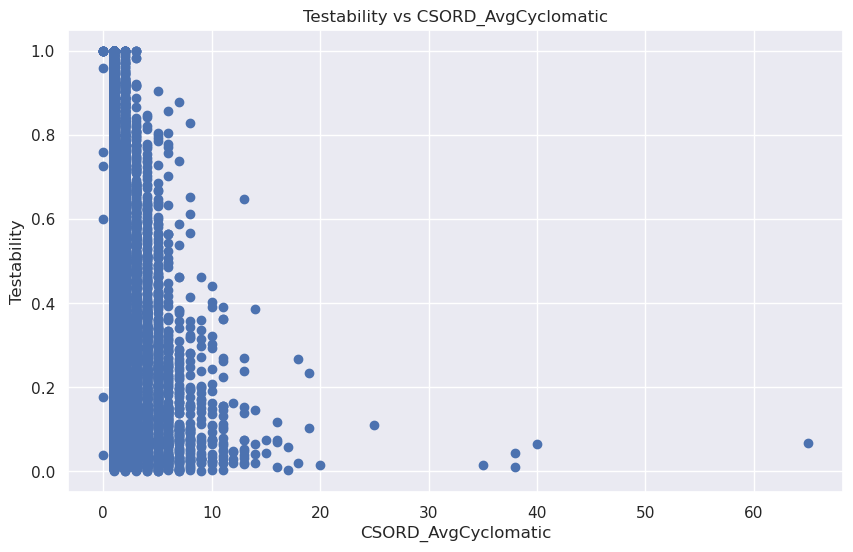

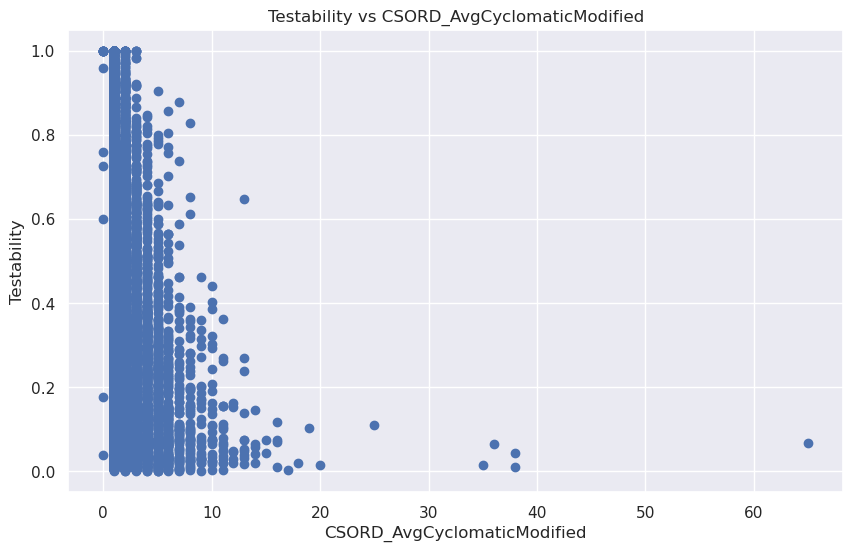

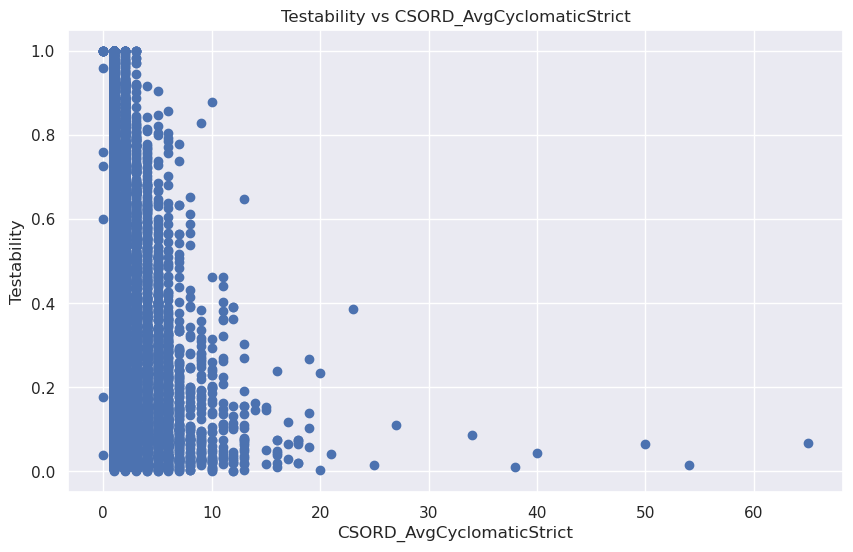

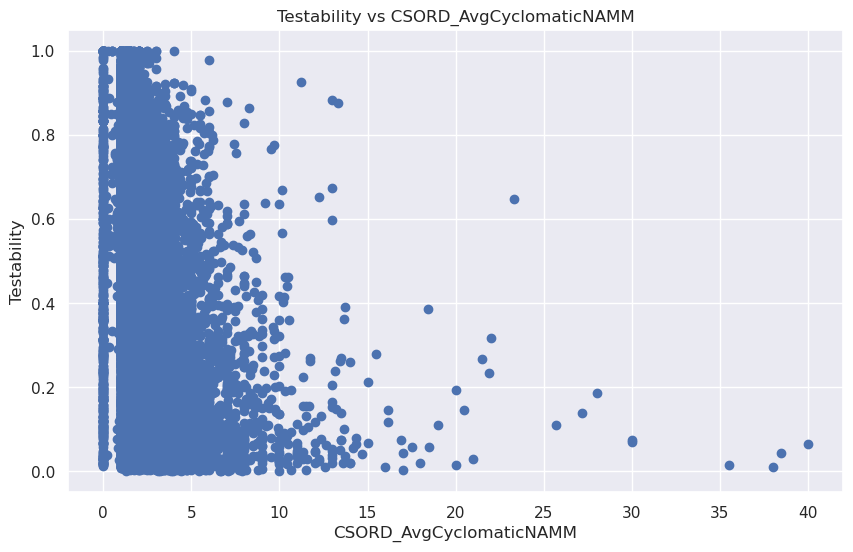

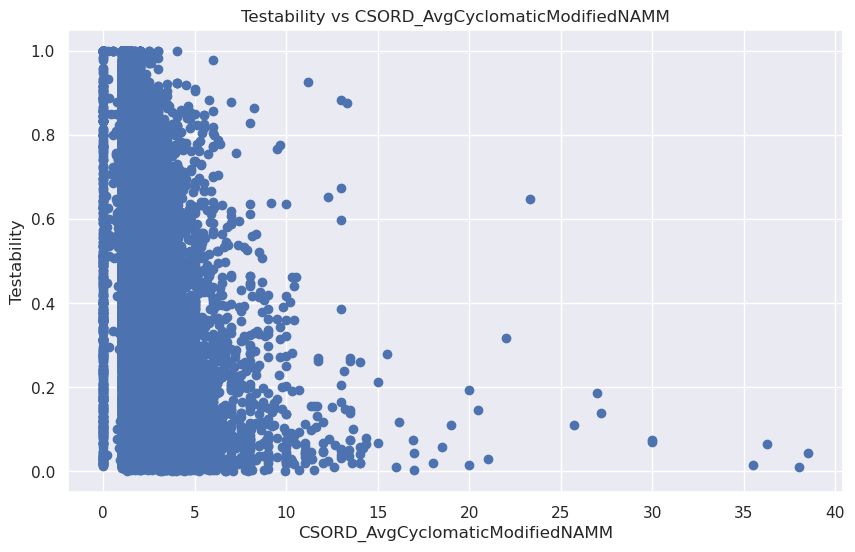

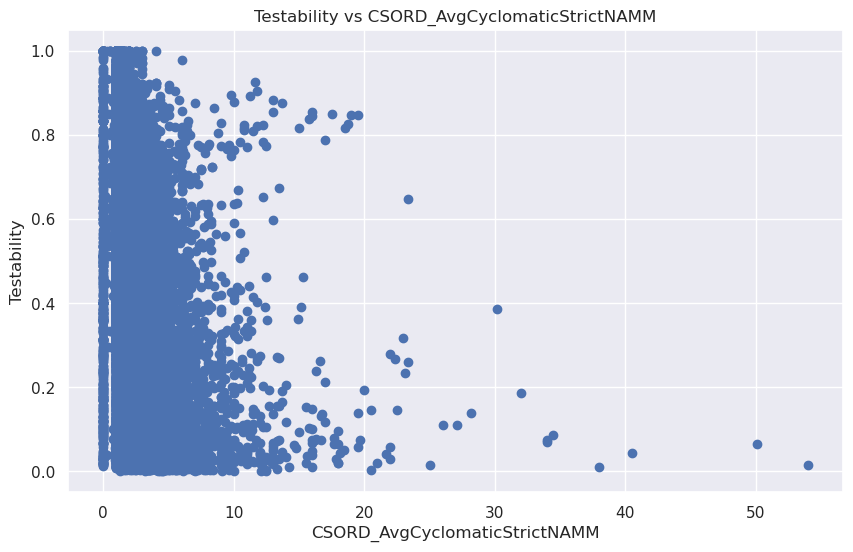

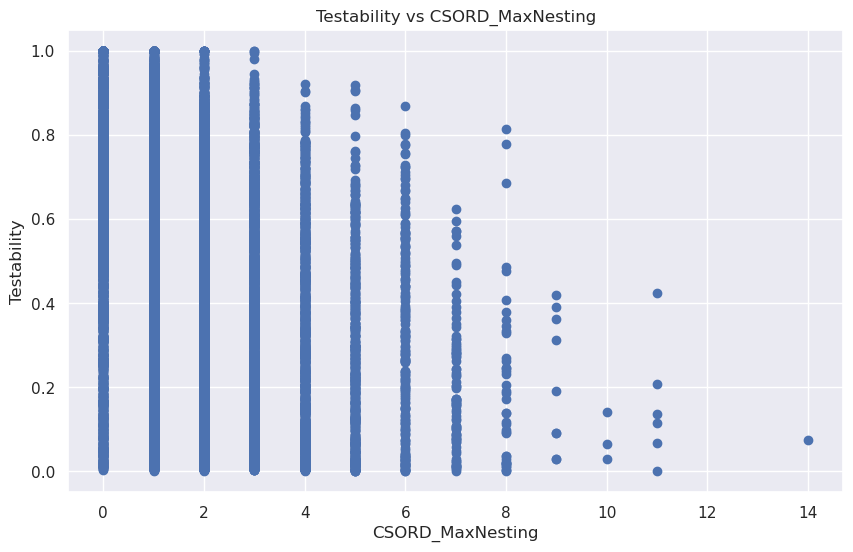

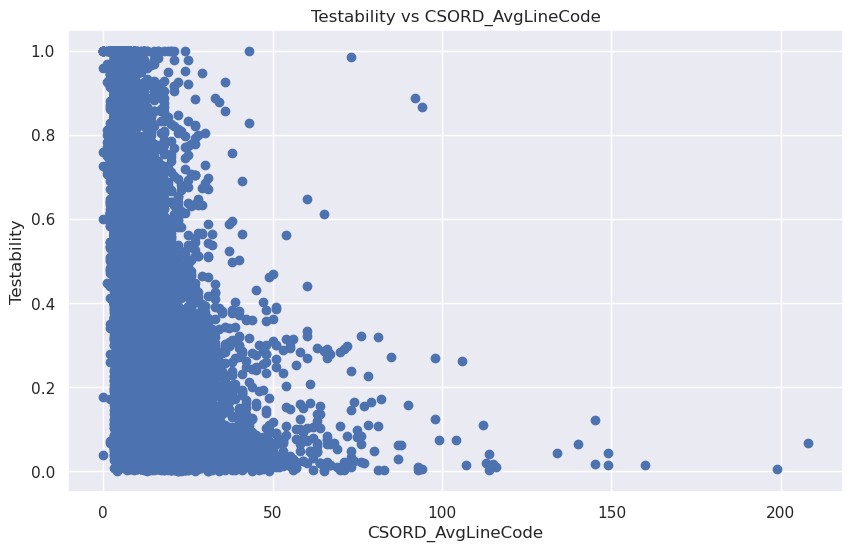

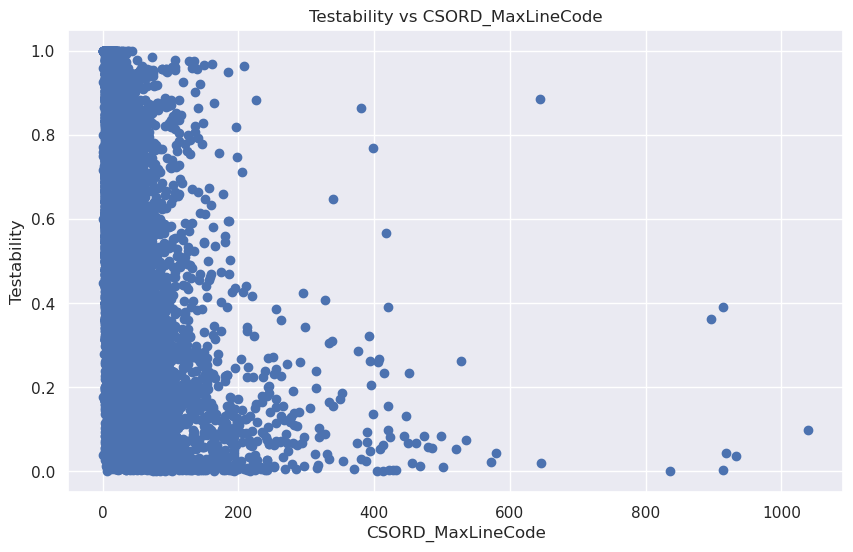

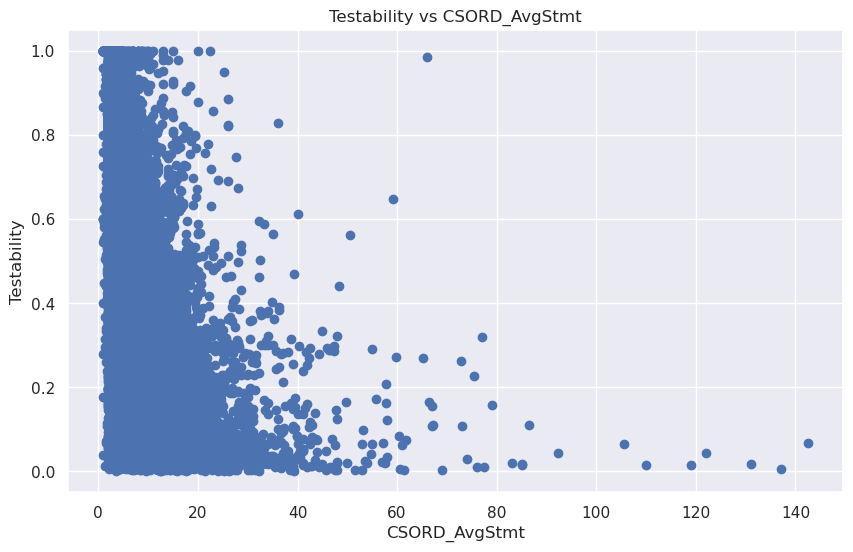

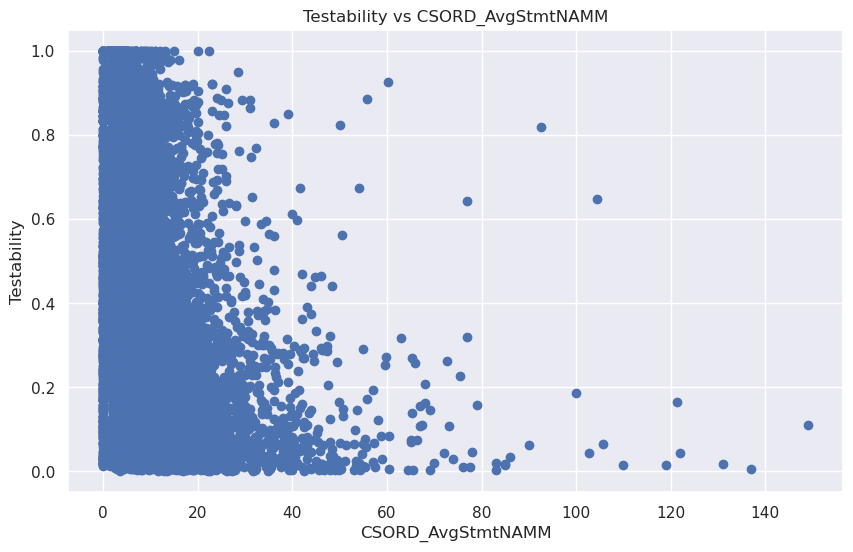

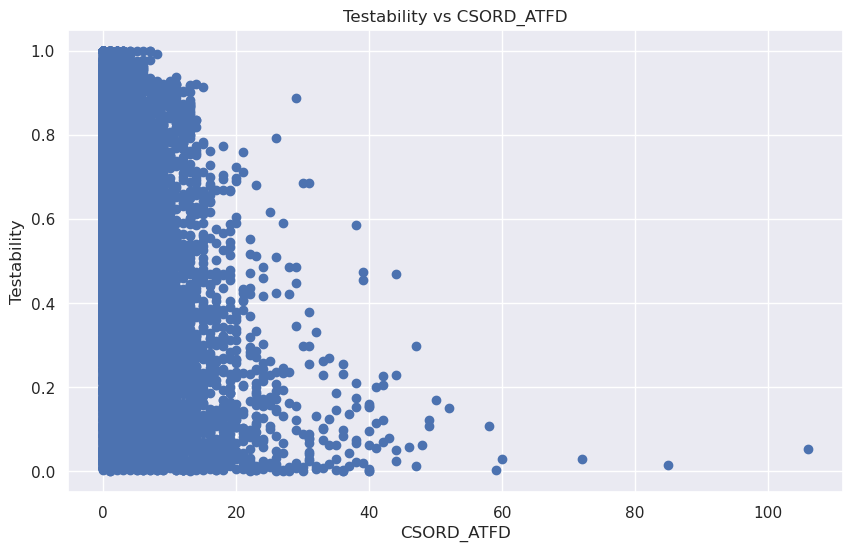

In [23]:
# Assume the following columns have the highly impact on Testability
features = ['CSORD_AvgCyclomatic', 'CSORD_AvgCyclomaticModified', 'CSORD_AvgCyclomaticStrict', 'CSORD_AvgCyclomaticNAMM', 
            'CSORD_AvgCyclomaticModifiedNAMM', 'CSORD_AvgCyclomaticStrictNAMM', 'CSORD_MaxNesting', 'CSORD_AvgLineCode', 
            'CSORD_MaxLineCode', 'CSORD_AvgStmt', 'CSORD_AvgStmtNAMM', 'CSORD_ATFD']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['Testability'])
    plt.xlabel(feature)
    plt.ylabel('Testability')
    plt.title(f'Testability vs {feature}')
    plt.show()

In [24]:
# # Based on the scatter plots, concluded that the following variables are more important than others
# dfs = df[['CSORD_AvgCyclomaticModified', 'CSORD_AvgCyclomaticStrict', 
#           'CSORD_MaxNesting', 'CSORD_AvgLineCode', 'CSORD_AvgStmtNAMM', 
#           'CSORD_ATFD', 'Testability']].copy()

In [25]:
df['Testability'].describe()

count    16165.000000
mean         0.503820
std          0.296545
min          0.000667
25%          0.256002
50%          0.509804
75%          0.743733
max          1.000000
Name: Testability, dtype: float64

<AxesSubplot:xlabel='Testability', ylabel='Density'>

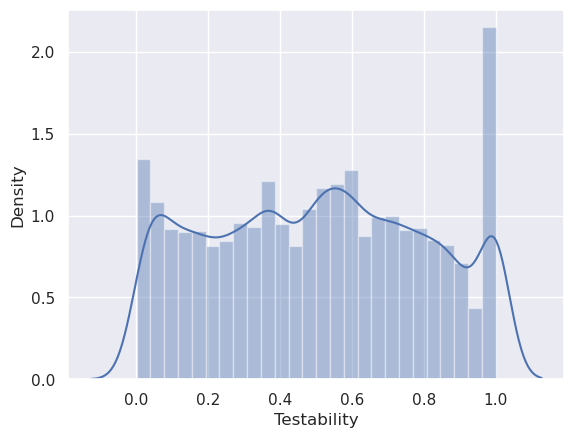

In [26]:
sns.distplot(df['Testability'])

In [27]:
print("Skewness: %f" % df['Testability'].skew())
print("Kurtosis: %f" % df['Testability'].kurt())

Skewness: 0.032879
Kurtosis: -1.105438


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


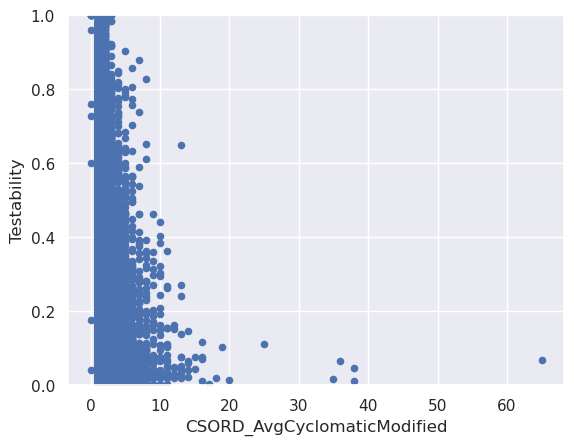

In [28]:
var = 'CSORD_AvgCyclomaticModified'
data = pd.concat([df['Testability'], df[var]], axis=1)
data.plot.scatter(x=var, y='Testability', ylim=(0,1));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


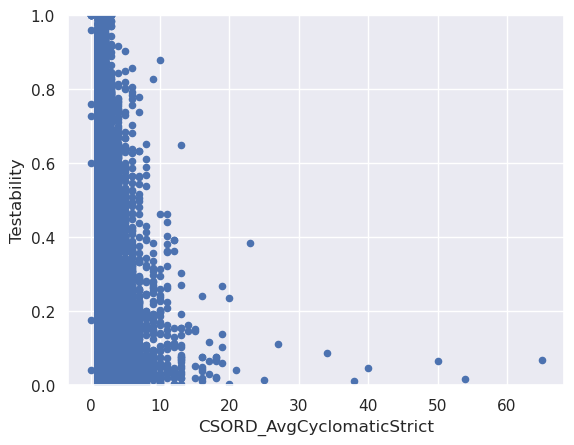

In [29]:
var = 'CSORD_AvgCyclomaticStrict'
data = pd.concat([df['Testability'], df[var]], axis=1)
data.plot.scatter(x=var, y='Testability', ylim=(0,1));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


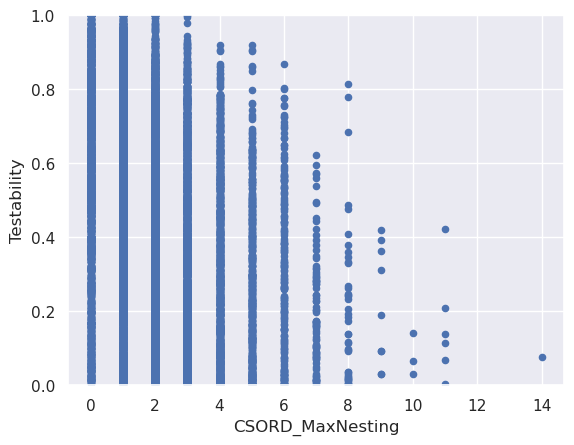

In [30]:
var = 'CSORD_MaxNesting'
data = pd.concat([df['Testability'], df[var]], axis=1)
data.plot.scatter(x=var, y='Testability', ylim=(0,1));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


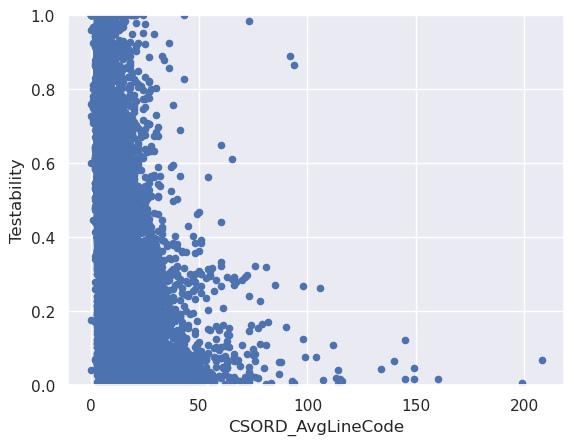

In [31]:
var = 'CSORD_AvgLineCode'
data = pd.concat([df['Testability'], df[var]], axis=1)
data.plot.scatter(x=var, y='Testability', ylim=(0,1));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


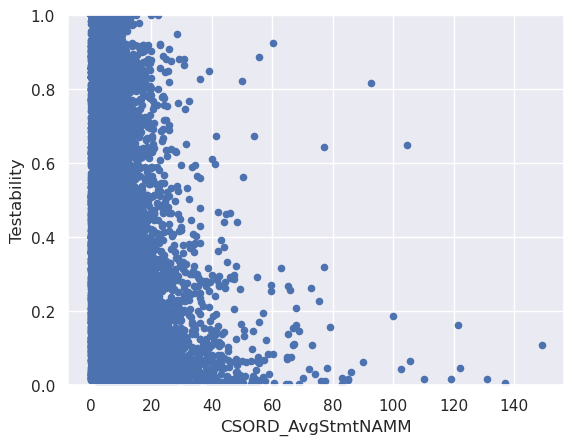

In [32]:
var = 'CSORD_AvgStmtNAMM'
data = pd.concat([df['Testability'], df[var]], axis=1)
data.plot.scatter(x=var, y='Testability', ylim=(0,1));

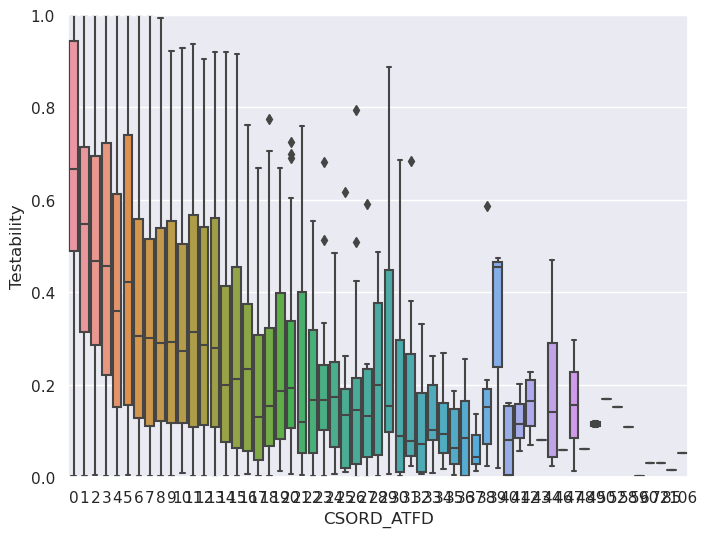

In [33]:
var = 'CSORD_ATFD'
data = pd.concat([df['Testability'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Testability', data=data)
fig.axis(ymin=0, ymax=1);

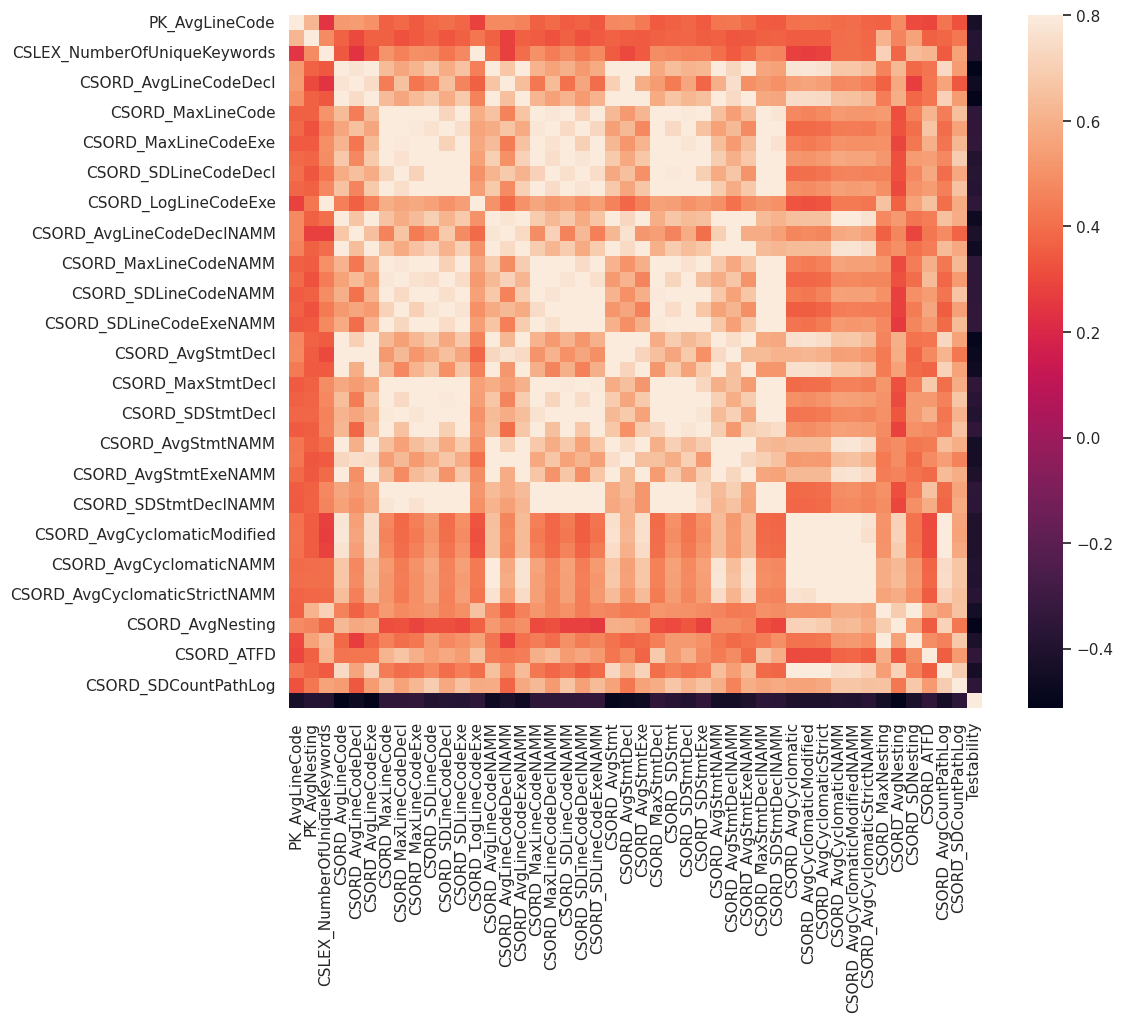

In [34]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

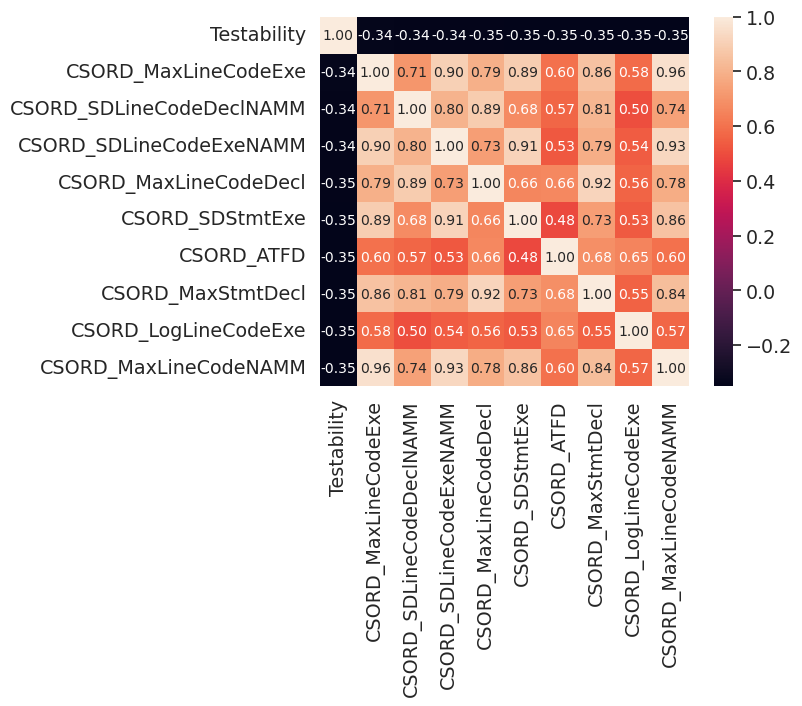

In [35]:
k = 10
cols = corrmat.nlargest(k, 'Testability')['Testability'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

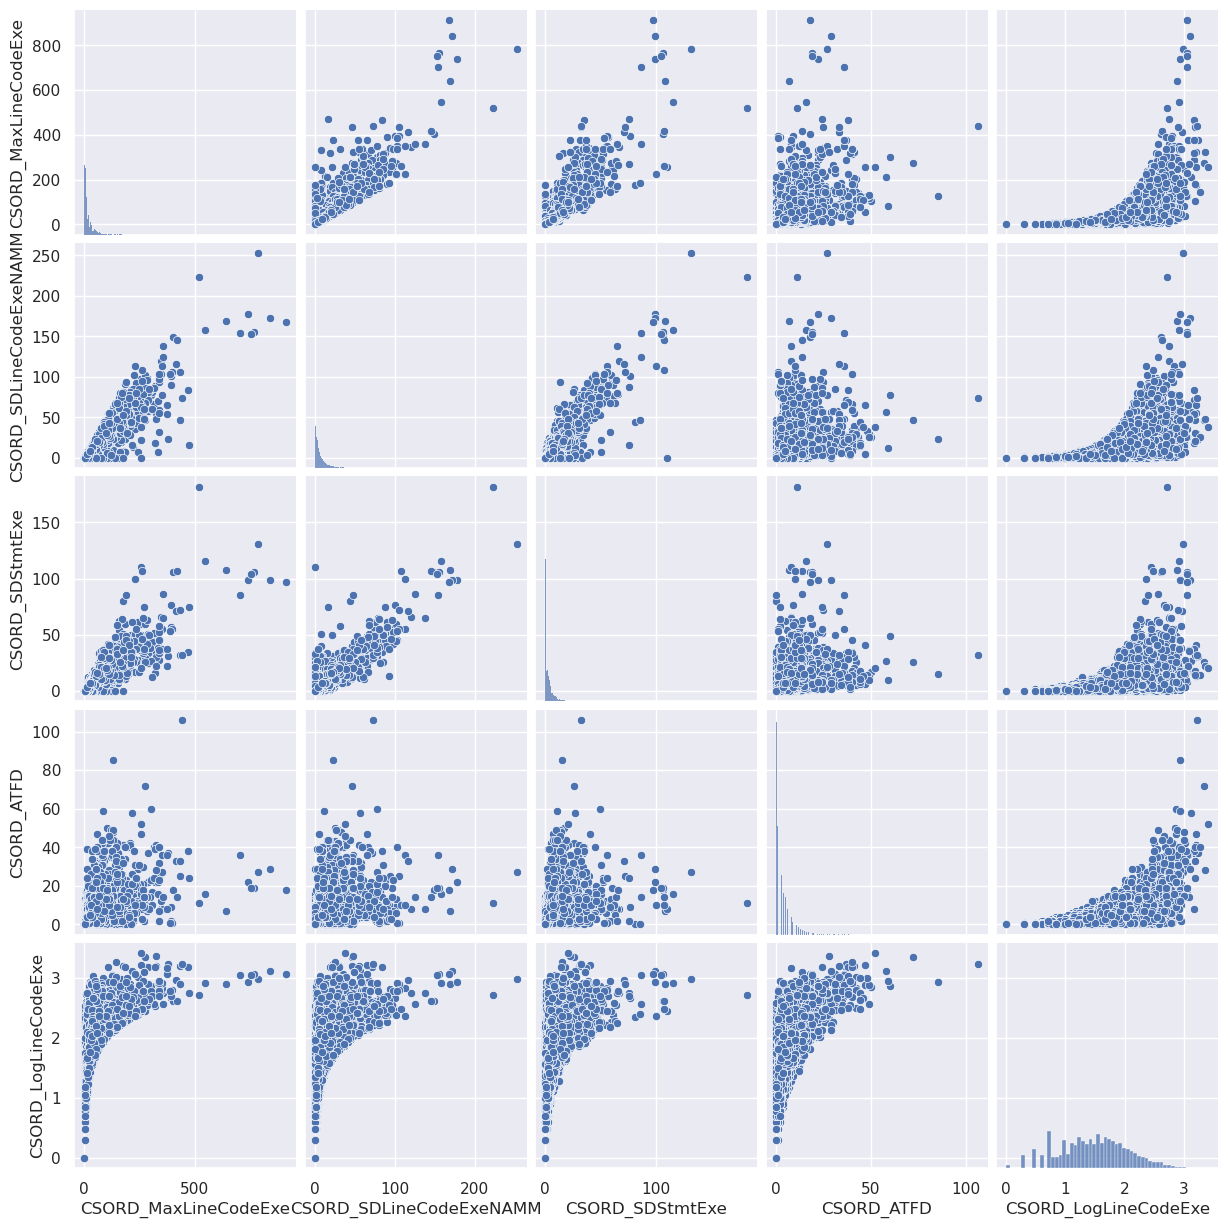

In [36]:
sns.set()
cols = ['CSORD_MaxLineCodeExe', 'CSORD_SDLineCodeExeNAMM', 'CSORD_SDStmtExe', 'CSORD_ATFD', 'CSORD_LogLineCodeExe']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [37]:
df.isnull().sum().max()

0

In [38]:
#standardizing data
testability_scaled = StandardScaler().fit_transform(df['Testability'][:,np.newaxis]);
low_range = testability_scaled[testability_scaled[:,0].argsort()][:10]
high_range= testability_scaled[testability_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.69677081]
 [-1.69677081]
 [-1.69564672]
 [-1.69564672]
 [-1.69452263]
 [-1.69452263]
 [-1.69452263]
 [-1.69452263]
 [-1.69339854]
 [-1.69339854]]

outer range (high) of the distribution:
[[1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]
 [1.67325291]]


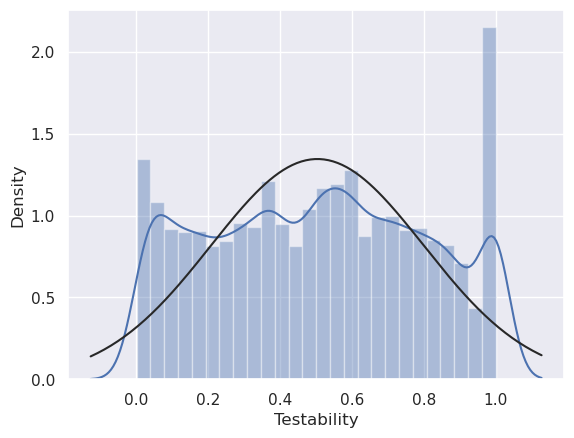

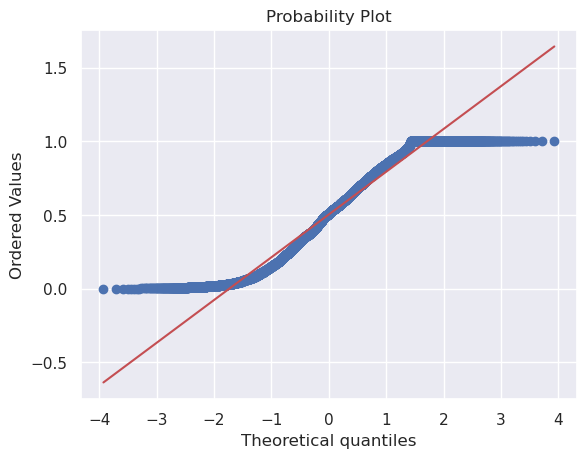

In [39]:
sns.distplot(df['Testability'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Testability'], plot=plt)

In [40]:
#applying log transformation
df['Testability'] = np.log(df['Testability'])

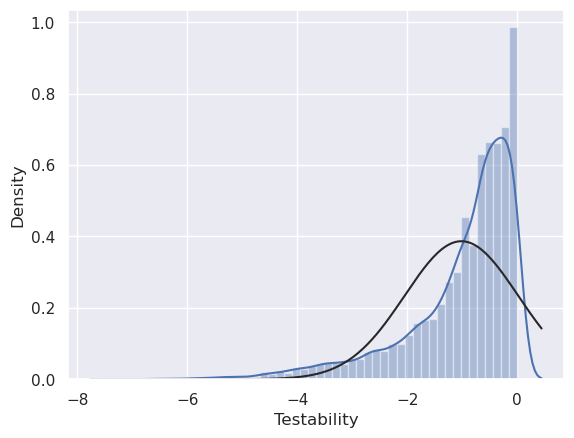

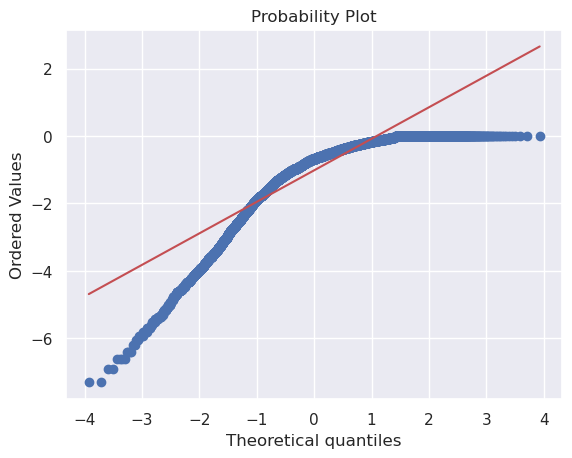

In [41]:
#transformed histogram and normal probability plot
sns.distplot(df['Testability'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Testability'], plot=plt)

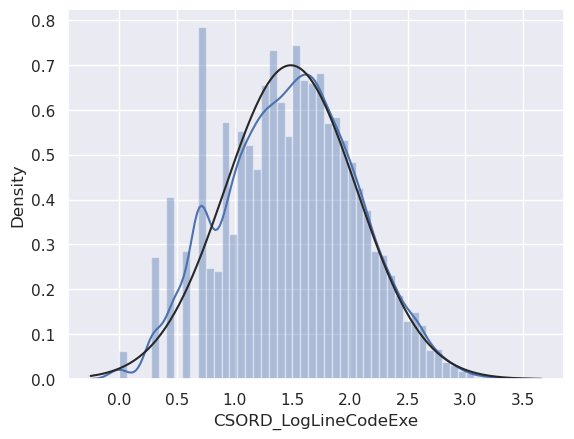

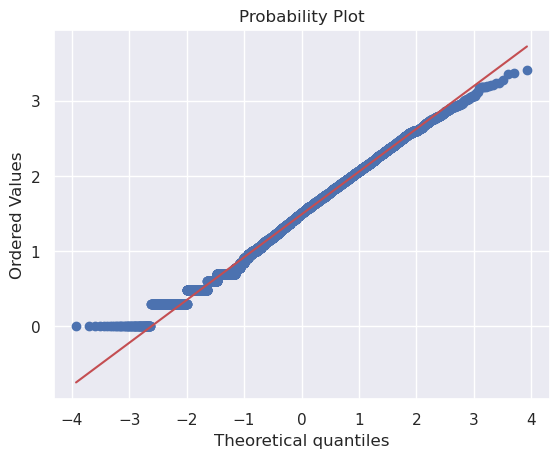

In [42]:
#histogram and normal probability plot
sns.distplot(df['CSORD_LogLineCodeExe'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CSORD_LogLineCodeExe'], plot=plt)

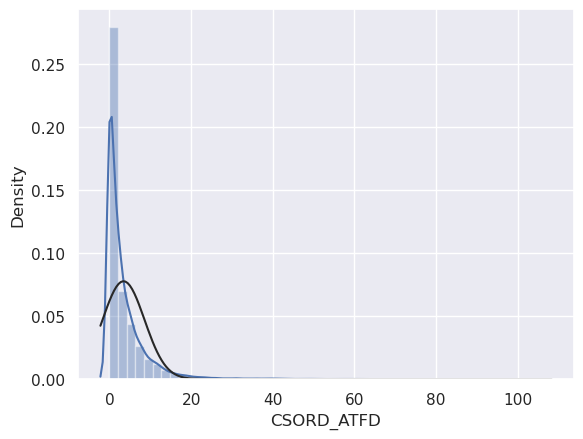

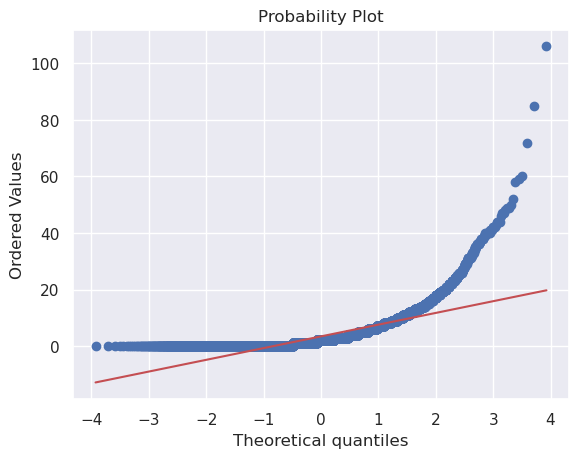

In [43]:
#histogram and normal probability plot
sns.distplot(df['CSORD_ATFD'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CSORD_ATFD'], plot=plt)

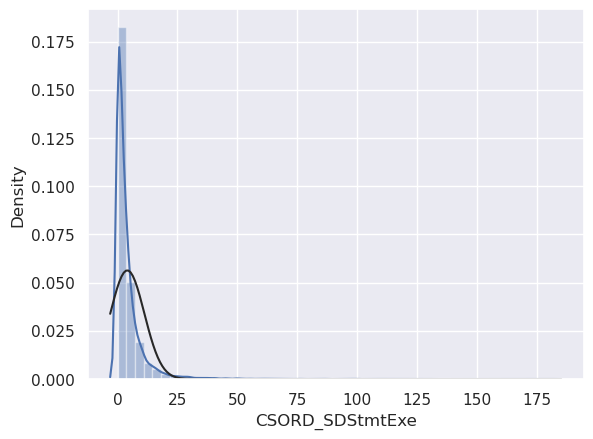

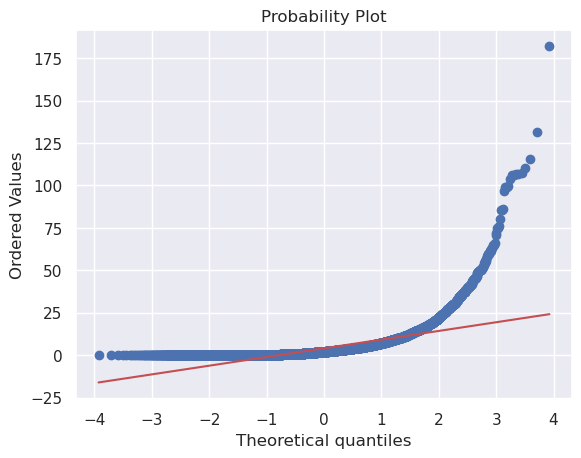

In [44]:
#histogram and normal probability plot
sns.distplot(df['CSORD_SDStmtExe'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CSORD_SDStmtExe'], plot=plt)

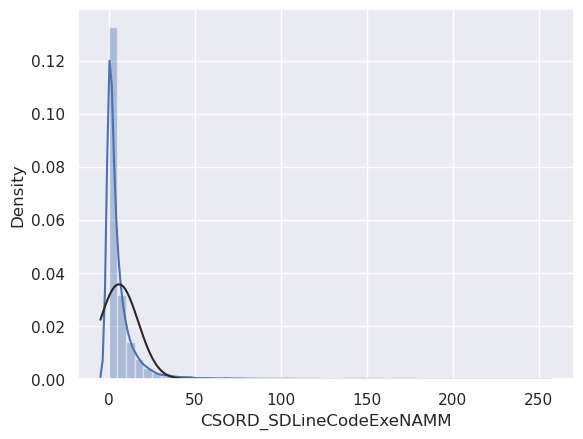

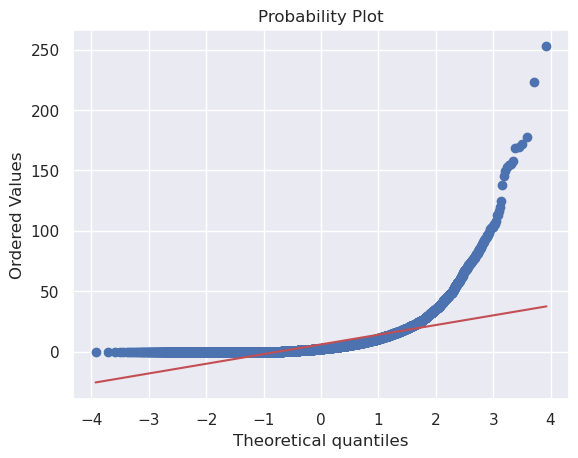

In [45]:
#histogram and normal probability plot
sns.distplot(df['CSORD_SDLineCodeExeNAMM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CSORD_SDLineCodeExeNAMM'], plot=plt)

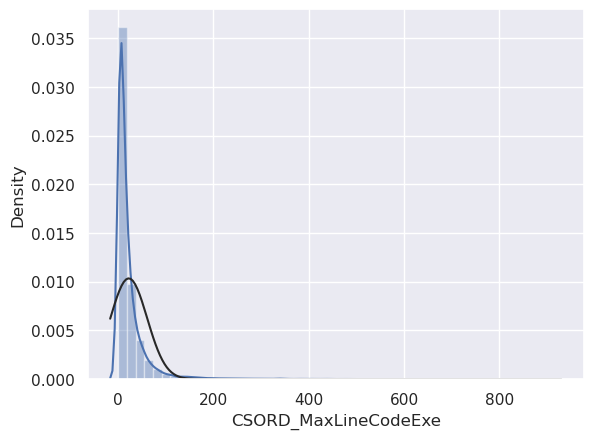

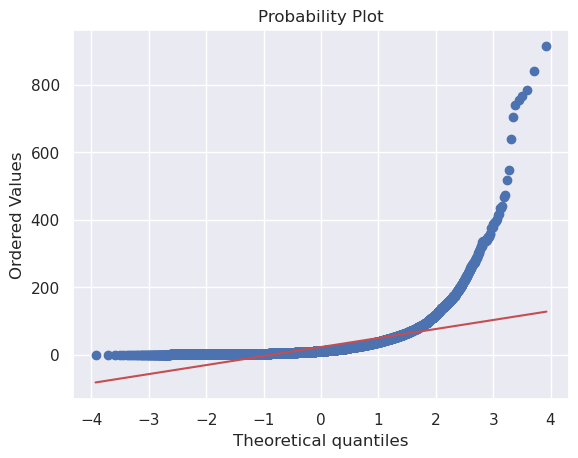

In [46]:
#histogram and normal probability plot
sns.distplot(df['CSORD_MaxLineCodeExe'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CSORD_MaxLineCodeExe'], plot=plt)

In [47]:
#convert categorical variable into dummy
df = pd.get_dummies(df)